<a href="https://colab.research.google.com/github/the-cryptozoologist/data-science/blob/main/stats/principal-component-analysis/pca-neuro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

In [289]:
# Imports 

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
data = loadmat("/content/drive/My Drive/Colab Notebooks/Projects/stateSpaceTrajectories/ALMdata.mat")

In [142]:
no_pref = data["PSTH_nonprefer_cue_aligned"]
pref = data["PSTH_prefer_cue_aligned"]

t = data["t"][0]

chanidx = data["Channel_all"]

print(f"{no_pref.shape}\n{pref.shape}\n{t.shape}\n{chanidx.shape}")

chanidx = chanidx.flatten()

print(chanidx.shape)

(1186, 5101)
(1186, 5101)
(5101,)
(1186, 1)
(1186,)


Text(0.5, 1.0, 'Preferred')

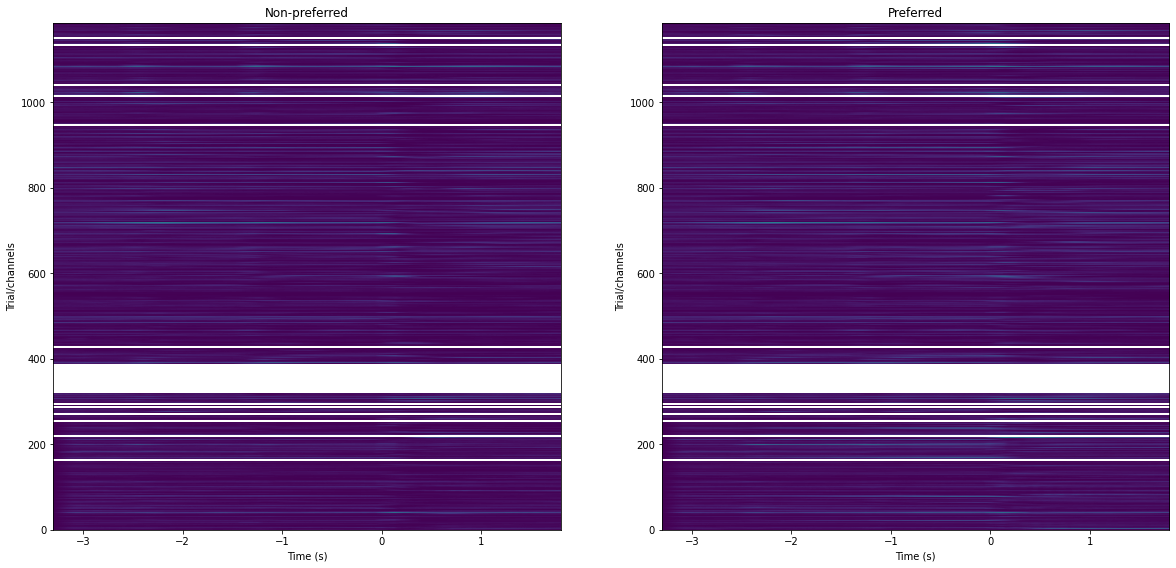

In [143]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].imshow(no_pref,extent=[t[0],t[-1],0,no_pref.shape[0]],origin="top")
ax[0].set_aspect(1/ax[0].get_data_ratio())

ax[1].imshow(pref, extent=[t[0],t[-1],0,pref.shape[0]],origin="top")
ax[1].set_aspect(1/ax[0].get_data_ratio())

ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Trial/channels")
ax[0].set_title("Non-preferred")

ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Trial/channels")
ax[1].set_title("Preferred")

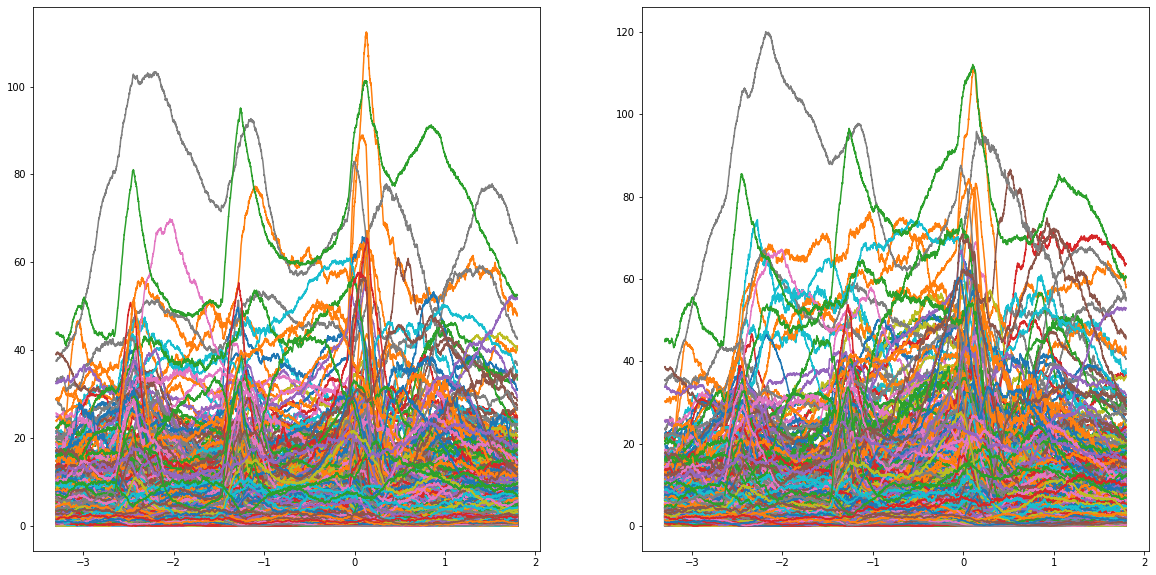

In [144]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(t,no_pref.T)
ax[1].plot(t, pref.T)

plt.show()

In [145]:
no_pref = no_pref[np.isfinite(no_pref[:,0]),:]

chanidx = chanidx[np.isfinite(pref[:,0])]

pref = pref[np.isfinite(pref[:,0]),:]

In [146]:
print(no_pref.shape)
print(pref.shape)
print(chanidx.shape)

(1111, 5101)
(1111, 5101)
(1111,)


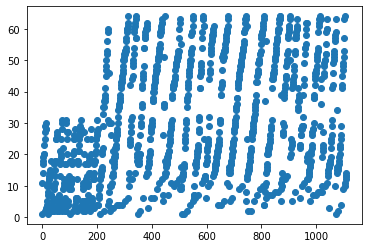

In [147]:
plt.plot(chanidx, "o")


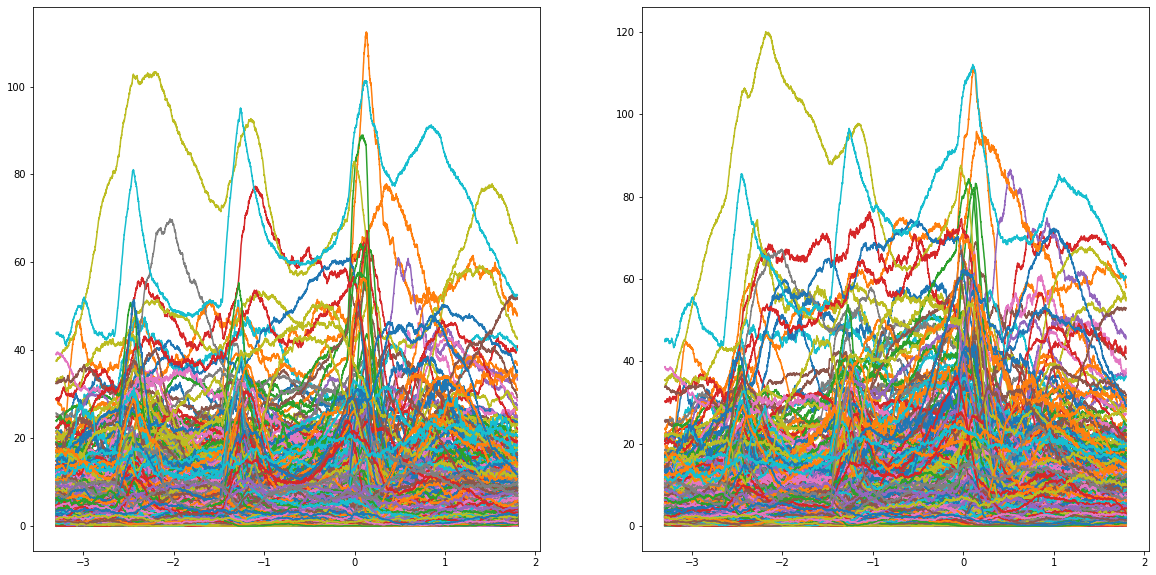

In [148]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(t,no_pref.T)
ax[1].plot(t, pref.T)

plt.show()

Text(0.5, 1.0, 'Preferred')

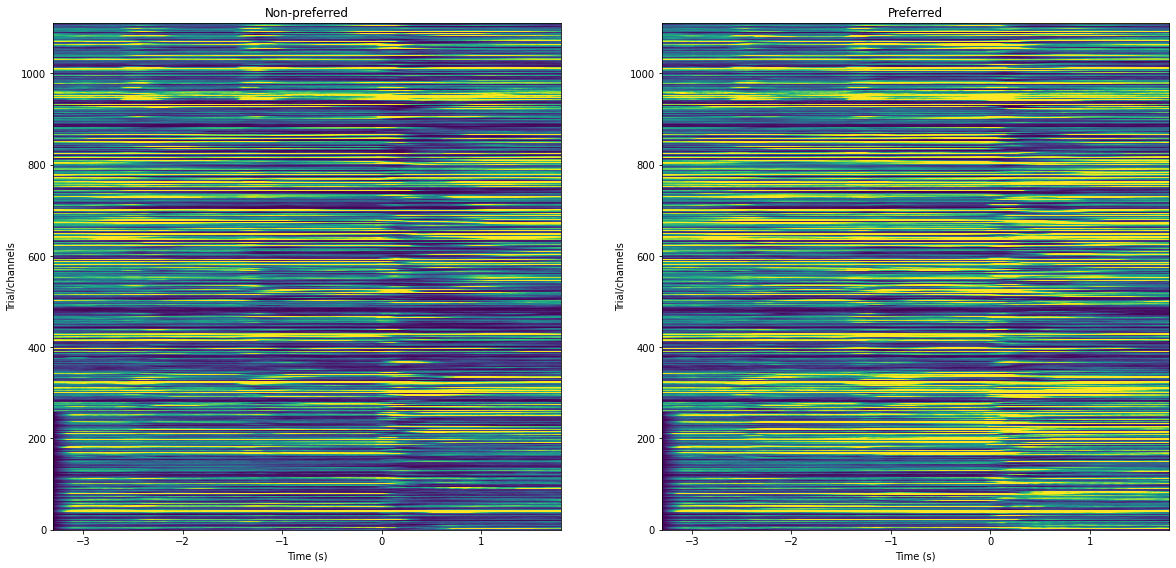

In [149]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].imshow(no_pref,extent=[t[0],t[-1],0,no_pref.shape[0]],vmin=0,vmax=10,origin="top")
ax[0].set_aspect(1/ax[0].get_data_ratio())

ax[1].imshow(pref, extent=[t[0],t[-1],0,pref.shape[0]],vmin=0,vmax=10,origin="top")
ax[1].set_aspect(1/ax[0].get_data_ratio())

ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Trial/channels")
ax[0].set_title("Non-preferred")

ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Trial/channels")
ax[1].set_title("Preferred")

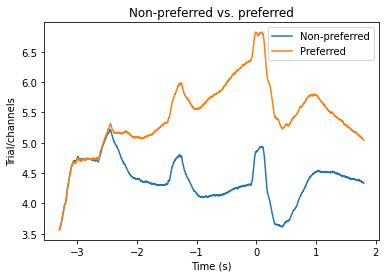

In [150]:
plt.plot(t,np.mean(no_pref,axis=0), label="Non-preferred")
plt.plot(t,np.mean(pref,axis=0), label="Preferred")

plt.title("Non-preferred vs. preferred")
plt.xlabel("Time (s)")
plt.ylabel("Trial/channels")
plt.legend()

plt.show()

# Channel covariance matrix

In [152]:
# New data matrices

nchans = np.max(chanidx)

# Matrix function

def get_matrix(data, nchans, chanavg):
  for i in range(1,nchans+1):
    chanavg[i-1,:] = np.mean(data[chanidx==i,:], axis=0)
  return chanavg

# Create matrices

no_pref_matrix = np.zeros((nchans,len(t)))
pref_matrix = np.zeros((nchans,len(t)))

chanavg_no_pref = get_matrix(no_pref, nchans, no_pref_matrix)
chanavg_pref = get_matrix(pref, nchans, pref_matrix)

chanavg_no_pref.shape

(64, 5101)

Text(0.5, 1.0, 'Preferred')

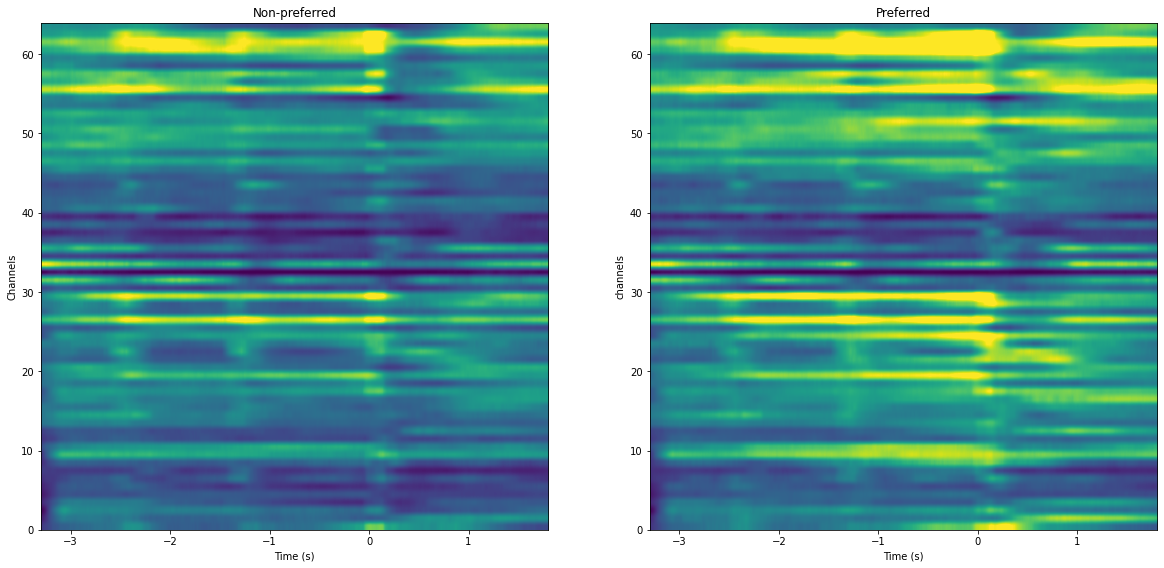

In [153]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].imshow(chanavg_no_pref,extent=[t[0],t[-1],0,nchans],vmin=0,vmax=10,origin="top")
ax[0].set_aspect(1/ax[0].get_data_ratio())

ax[1].imshow(chanavg_pref, extent=[t[0],t[-1],0,nchans],vmin=0,vmax=10,origin="top")
ax[1].set_aspect(1/ax[0].get_data_ratio())

ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Channels")
ax[0].set_title("Non-preferred")

ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("channels")
ax[1].set_title("Preferred")

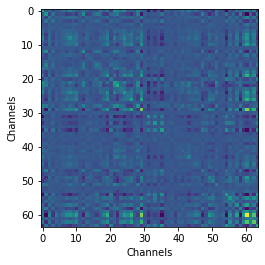

In [155]:
# Covariance matrices

covmat_pref = np.cov(chanavg_pref)
covmat_no_pref = np.cov(chanavg_no_pref)

covmat = (covmat_pref + covmat_no_pref) / 2

plt.imshow(covmat)
plt.xlabel("Channels")
plt.ylabel("Channels")
plt.show()

# Matrix and eigenvector/value pairs

In [246]:
evals, evecs = np.linalg.eigh(covmat)

sidx = np.argsort(evals)[::-1]

evals = evals[sidx]
evecs = evecs[:,sidx]

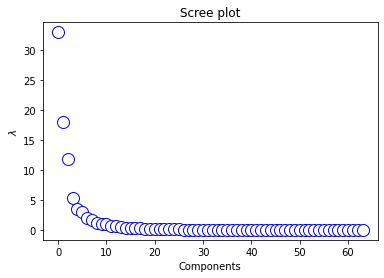

In [247]:
plt.plot(evals, "bo", markerfacecolor="w", markersize=12)
plt.xlabel("Components")
plt.ylabel("$\lambda$")
plt.title("Scree plot")
plt.show()

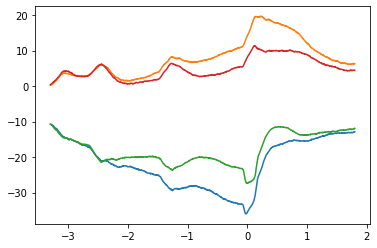

In [248]:
# PC time series

pcnopr = evecs[:,0:2].T @ chanavg_no_pref
pcpr = evecs[:,0:2].T @ chanavg_pref

plt.plot(t, pcpr.T, t, pcnopr.T)
plt.show()

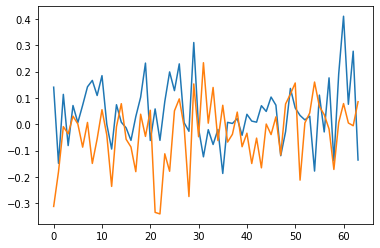

In [249]:
plt.plot(-evecs[:,0:2])

In [250]:
def flipparoo(evecs,n):
  for i in range(n):
    maxi = np.argmax(abs(evecs[:,i]))
    evecs[:,i] *= np.sign(evecs[maxi,i])
  return evecs

In [260]:
evecs = flipparoo(evecs,nchans)

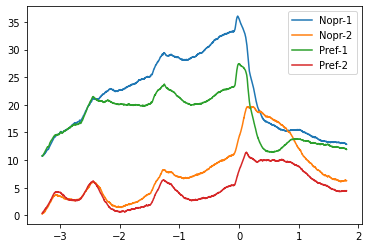

In [265]:
pcnopr = evecs[:,0:2].T @ chanavg_no_pref
pcpr = evecs[:,0:2].T @ chanavg_pref

plt.plot(t, pcpr.T, t, pcnopr.T)
plt.legend(["Nopr-1","Nopr-2","Pref-1", "Pref-2"])
plt.show()

# State-space trajectories

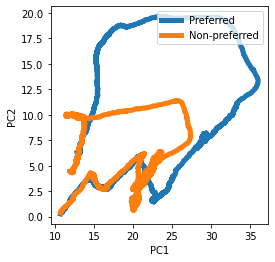

In [288]:
plt.plot(pcpr[0,:],pcpr[1,:], label="Preferred", linewidth=5)
plt.plot(pcnopr[0,:], pcnopr[1,:], label="Non-preferred", linewidth=5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.legend()
plt.show()

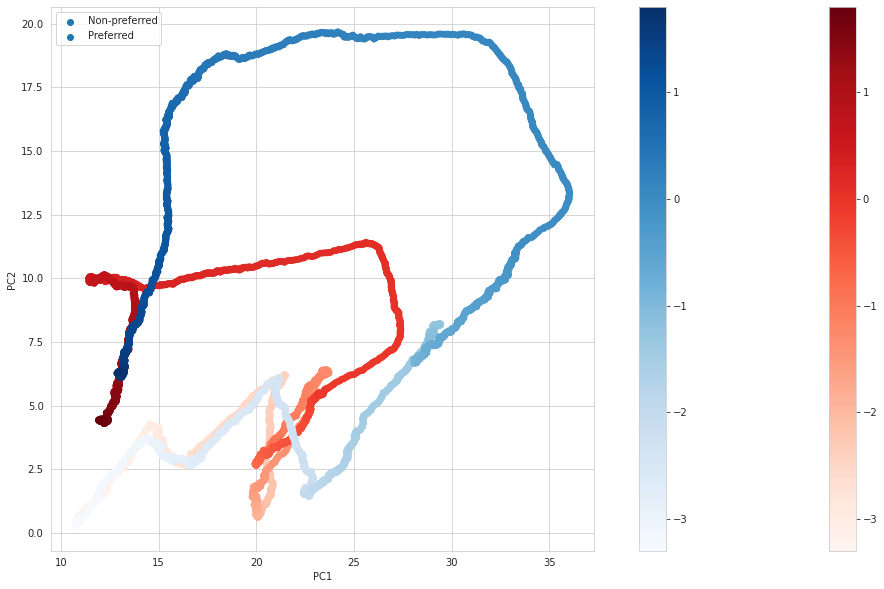

In [326]:
plt.figure(figsize=(20,10))

plt.scatter(x=pcnopr[0,:],y=pcnopr[1,:], cmap="Reds", c=t, label="Non-preferred")
plt.colorbar()
plt.scatter(x=pcpr[0,:], y=pcpr[1,:], cmap="Blues", c=t, label="Preferred")
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.legend()
plt.show()